In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import glob
# import os
from uncertainties import ufloat,unumpy
plt.rc('text',usetex=True)
# plt.rc('font', size=52)
# plt.rc('font', weight='bold')
# plt.rc('font', family='serif')          # controls default text sizes
# #plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=70)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
# plt.rc('legend', fontsize=20)    # legend fontsize
# plt.rc('figure', titlesize=20)  # fontsize of the figure title
# plt.rc('ytick', direction='in')
# plt.rc('xtick', direction='in')
# plt.rc('xtick.major',size=10)
# plt.rc('ytick.major',size=10)
# plt.rc('xtick.minor',size=5)
# plt.rc('ytick.minor',size=5)

(43, 1024)


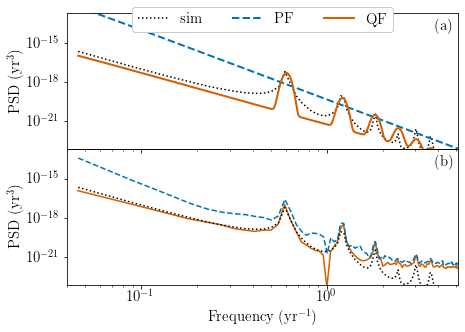

In [8]:
whites=[]
psds=[]
pl_psds=[]
en_psds=[]

stem="J1316"

ff= sorted(glob.glob(f"PSD_sims/{stem}+*/qp_MN/{stem}*.spec"))
for fn in ff:
    freq,psd = np.loadtxt(fn,usecols=(0,1),unpack=True)
    psds.append(psd)
    
ff= sorted(glob.glob(f"PSD_sims/{stem}+*/powerlaw_MN/{stem}*.spec"))
for fn in ff:
    freq,psd = np.loadtxt(fn,usecols=(0,1),unpack=True)
    pl_psds.append(psd)
    
ff= sorted(glob.glob(f"PSD_sims/{stem}+*/plspec.txt"))
for fn in ff:
    f2,p2 = np.loadtxt(fn,unpack=True).T
    en_psds.append(p2)
    
psds=np.array(psds)
print(psds.shape)
#plt.loglog(freq,psds[0])

m1 = np.loadtxt(f"PSD_sims/{stem}+0001/tn.txt").T
m2 = np.loadtxt(f"PSD_sims/{stem}+0001/tnqp.txt").T
m3 = np.loadtxt(f"PSD_sims/{stem}+0001/ref.txt").T
m4 = np.loadtxt(f"PSD_sims/{stem}+0001/t2fun.txt").T

m_x = np.loadtxt("sim3.txt").T
#FFF=((365.25*86400.0)**2*365.25*4096*2)/1024/16
FFF=2.0
plt.rcParams.update({'font.size': 15,'font.family':'serif'})


cp=seaborn.color_palette('colorblind')
cp2=seaborn.color_palette('dark')
plt.figure(figsize=(7,5))
plt.subplot(212)
plt.plot(freq,np.mean(psds,axis=0),color=cp[3], label='QP')
# plt.plot(freq,np.mean(pl_psds,axis=0),color=cp[0],ls='--')
plt.plot(f2,np.mean(en_psds,axis=0),color=cp[0],ls='--', label='PL')
#plt.plot(m_x[:128,0]*365.25,m_x[:128,1]/FFF,color='k',ls=':')
plt.plot(m_x[:,0],m_x[:,1]/FFF,color='k',ls=':', label='simulated')



# plt.axhline(4.84e-23,ls='--',color='gray')



FREQ2=freq
PS2 = np.mean(psds,axis=0)


#plt.plot(m1[:,0],m1[:,1],color=cp2[2],lw=2,ls='--')
#plt.plot(m2[:,0],m2[:,1],color=cp2[0],lw=2)
#plt.plot(m3[:,0],m3[:,1],color=cp2[3],lw=2,ls='--')
#plt.plot(m4[:,0],m4[:,1],color=cp2[0],lw=2,ls='--')
#plt.plot(freq,psds[0])
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.ylabel(r"PSD (yr$^3$)")

#plt.xlabel(r"Freq (yr$^{-1}$)")

plt.xlim(0.04,5.1)
plt.ylim(0.8e-23,2e-13)
plt.tick_params(
    axis='y',          
    which='both',      
    left=True, right=False) 
plt.text(0.99, 0.96, '(b)',
     horizontalalignment='right',
     verticalalignment='top',
     transform = plt.gca().transAxes)
plt.gca().set_facecolor('none')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=True,top=False,labeltop=False,labelbottom=True) 

plt.xlabel(r"Frequency (yr$^{-1}$)")


plt.subplot(211)
plt.tick_params(
    axis='y',          
    which='both',      
    left=True, right=False,
    labelleft=True,labelright=False) 
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=True,top=False,labeltop=False,labelbottom=False) 

#plt.plot(freq,np.mean(psds,axis=0),color='k',ls=':')
#plt.plot(m_x[:128,0]*365.25,m_x[:128,1]/FFF,color='k',ls=':')
plt.plot(m_x[:,0],m_x[:,1]/FFF,color='k',ls=':', label='sim')

plt.plot(m1[:,0],m1[:,1],color=cp[0],lw=2,ls='--', label='PF')
#plt.plot(m2[:,0],m2[:,1],color=cp2[0],lw=2)
# plt.plot(m3[:,0],m3[:,1],color=cp[0],lw=2,ls='--')
plt.plot(m4[:,0],m4[:,1],color=cp[3],lw=2, label='QF')


# plt.axhline(4.84e-23,ls='--',color='gray')

#plt.plot(freq,psds[0])
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.ylabel(r"PSD (yr$^3$)")
#plt.xlabel(r"Freq (yr$^{-1}$)")
plt.xlim(0.04,5.1)
plt.ylim(0.8e-23,2e-13)
#plt.tight_layout()




# whites=[]
# psds=[]
# pl_psds=[]
# en_psds=[]

# stem="J1310"

# ff= sorted(glob.glob(f"PSD_sims/{stem}+*/qp_MN/{stem}*.spec"))
# for fn in ff:
#     freq,psd = np.loadtxt(fn,usecols=(0,1),unpack=True)
#     psds.append(psd)
    
# ff= sorted(glob.glob(f"PSD_sims/{stem}+*/powerlaw_MN/{stem}*.spec"))
# for fn in ff:
#     freq,psd = np.loadtxt(fn,usecols=(0,1),unpack=True)
#     pl_psds.append(psd)
    
# ff= sorted(glob.glob(f"PSD_sims/{stem}+*/plspec.txt"))
# for fn in ff:
#     f2,p2 = np.loadtxt(fn,unpack=True).T
#     en_psds.append(p2)
    
# psds=np.array(psds)
# print(psds.shape)
# #plt.loglog(freq,psds[0])

# m1 = np.loadtxt(f"PSD_sims/{stem}+0001/tn.txt").T
# m2 = np.loadtxt(f"PSD_sims/{stem}+0001/tnqp.txt").T
# m3 = np.loadtxt(f"PSD_sims/{stem}+0001/ref.txt").T
# m4 = np.loadtxt(f"PSD_sims/{stem}+0001/t2fun.txt").T

# m_x = np.loadtxt("sim3.txt").T
# #FFF=((365.25*86400.0)**2*365.25*4096*2)/1024/16
# FFF=2.0
plt.text(0.99, 0.96, '(a)',
     horizontalalignment='right',
     verticalalignment='top',
     transform = plt.gca().transAxes)
plt.gca().set_facecolor('none')

# plt.subplot(313)
# MAX=112
# plt.plot(freq[:MAX],np.mean(psds,axis=0)[:MAX],color=cp[0])
# plt.plot(freq[:MAX],np.mean(pl_psds,axis=0)[:MAX],color=cp[3],ls='--')
# plt.plot(f2[:MAX],np.mean(en_psds,axis=0)[:MAX],color=cp[2],ls='-.')
# #plt.plot(m_x[:128,0]*365.25,m_x[:128,1]/FFF,color='k',ls=':')
# plt.plot(m_x[:,0],m_x[:,1]/FFF,color='k',ls=':')


# plt.axhline(5.9e-23,ls='--',color='gray')



# FREQ2=freq
# PS2 = np.mean(psds,axis=0)


# #plt.plot(m1[:,0],m1[:,1],color=cp2[2],lw=2,ls='--')
# #plt.plot(m2[:,0],m2[:,1],color=cp2[0],lw=2)
# #plt.plot(m3[:,0],m3[:,1],color=cp2[3],lw=2,ls='--')
# #plt.plot(m4[:,0],m4[:,1],color=cp2[0],lw=2,ls='--')
# #plt.plot(freq,psds[0])
# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')
# plt.ylabel(r"PSD (yr$^3$)")
# plt.xlabel(r"Freq (yr$^{-1}$)")
# plt.xlim(0.04,7)
# plt.ylim(0.8e-23,2e-13)
plt.tick_params(
    axis='y',          
    which='both',      
    left=True, right=False) 

# #plt.plot(freq,psds[0])
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
#plt.ylabel(r"PSD (yr$^3$)")
# plt.xlabel(r"Freq (yr$^{-1}$)")
plt.xlim(0.04,5.1)
plt.ylim(0.8e-23,2e-13)

# plt.text(0.99, 0.96, '(c)',
#      horizontalalignment='right',
#      verticalalignment='top',
#      transform = plt.gca().transAxes)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.gca().set_facecolor('none')
plt.legend(loc='upper center',ncol=3,bbox_to_anchor=(0.5, 1.1),fancybox=True,framealpha=1, fontsize=15) 


plt.savefig("simulated_mean_psd_transpose.pdf",bbox_inches='tight')
plt.show()
